In [66]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd
import numpy as np

races_csv = "/content/drive/MyDrive/kagglef1/races.csv"
constructor_results_csv = "/content/drive/MyDrive/kagglef1/constructor_results.csv"
constructor_standings_csv = "/content/drive/MyDrive/kagglef1/constructor_standings.csv"
constructors_csv= "/content/drive/MyDrive/kagglef1/constructors.csv"
qualifying_csv = "/content/drive/MyDrive/kagglef1/qualifying.csv"
results_csv = "/content/drive/MyDrive/kagglef1/results.csv"
sprint_results_csv = "/content/drive/MyDrive/kagglef1/sprint_results.csv"

races_df = pd.read_csv(races_csv)
constructor_results_df = pd.read_csv(constructor_results_csv)
constructor_standings_df = pd.read_csv(constructor_standings_csv)
constructors_df = pd.read_csv(constructors_csv)
qualifying_df = pd.read_csv(qualifying_csv)
results_df = pd.read_csv(results_csv)
sprint_results_df = pd.read_csv(sprint_results_csv)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [67]:
# print(races_df.columns)
# def prepare_races(races_df):
#   races_df = races_df[['raceId', 'year', 'round', 'circuitId', 'name']].copy()
#   return races_df
# display(prepare_races(races_df))

races_df.head()
# races_df.columns

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [68]:
# ============================
#  CLEAN RACES
# ============================

def clean_races(df):
    df = df[['raceId', 'year', 'round', 'circuitId', 'date']].copy()
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['month'] = df['date'].dt.month
    df['dayofweek'] = df['date'].dt.dayofweek
    df.drop(columns=['date'], inplace=True)
    return df

races_clean = clean_races(races_df)

In [69]:
# print(constructor_results_df.columns)
# def prepare_constructor_results(constructor_results_df):
#   constructor_results_df = results_df[['constructorId', 'raceId', 'points']].copy() # not taking 'status'
#   print(1)
#   return constructor_results_df

# display(prepare_constructor_results(constructor_results_df))

constructor_results_df.head()
constructor_results_df.columns

Index(['constructorResultsId', 'raceId', 'constructorId', 'points', 'status'], dtype='object')

In [70]:
def clean_constructor_results(df):
    return df[['raceId', 'constructorId', 'points']].copy()

constructor_results_clean = clean_constructor_results(constructor_results_df)

# ============================
#  CLEAN CONSTRUCTOR STANDINGS
# ============================

In [71]:
# print(constructor_standings_df.columns)
# def prepare_constructor_standings(constructor_standings_df):
#   constructor_standings_df = constructor_standings_df[['constructorId', 'raceId', 'points', 'position', 'wins']].copy()
#   return constructor_standings_df
# display(prepare_constructor_standings(constructor_standings_df))

constructor_standings_df.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [72]:
def clean_constructor_standings(df):
    df = df[['raceId', 'constructorId', 'points', 'position', 'wins']]
    df.rename(columns={
        'points': 'standings_points',
        'position': 'standings_position',
        'wins': 'season_wins'
    }, inplace=True)
    return df

constructor_standings_clean = clean_constructor_standings(constructor_standings_df)

/tmp/ipython-input-173758145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


In [73]:
# print(constructors_df.columns)
# def prepare_constructors(constructors_df):
#   constructors_df = constructors_df[['constructorId', 'constructorRef', 'name', 'nationality']].copy()
#   return constructors_df
# display(prepare_constructors(constructors_df))

constructors_df.head()


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [74]:
def clean_constructors(df):
    return df[['constructorId', 'nationality']].copy()

constructors_clean = clean_constructors(constructors_df)

In [75]:
# print(qualifying_df.columns)
# def prepare_qualifying(qualifying_df):
#   qualifying_df = qualifying_df[['raceId', 'constructorId', 'position', 'q1', 'q2', 'q3']].copy()
#   return qualifying_df
# display(prepare_qualifying(qualifying_df))

qualifying_df.head()


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [76]:
# ============================
#  CLEAN QUALIFYING (aggregate per constructor)
# ============================

def clean_qualifying(df):
    df = df.copy()
    df['q1'] = df['q1'].apply(time_to_seconds)
    df['q2'] = df['q2'].apply(time_to_seconds)
    df['q3'] = df['q3'].apply(time_to_seconds)

    df = df[['raceId', 'constructorId', 'position', 'q1', 'q2', 'q3']]

    # Aggregate by constructor per race
    return df.groupby(['raceId', 'constructorId']).mean().reset_index()

qualifying_clean = clean_qualifying(qualifying_df)

In [77]:
# print(results_df.columns)
# def prepare_results(results_df):
#   results_df = results_df[['raceId', 'constructorId', 'grid', 'positionOrder', 'points', 'laps', 'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
#        'fastestLapSpeed']].copy()
#   return results_df
# display(prepare_results(results_df))

results_df.head()


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [78]:
# ============================
#  CLEAN RACE RESULTS
# ============================

def clean_results(df):
    df = df.copy()
    df['fastestLapTime'] = df['fastestLapTime'].apply(time_to_seconds)

    df = df[['raceId','constructorId','grid','position','positionOrder',
             'points','fastestLap','fastestLapTime','fastestLapSpeed']]

    return df

results_clean = clean_results(results_df)

In [79]:
# # it is duplicated of result
# print(sprint_results_df.columns)
# def prepare_sprint_results(sprint_results_df):
#   sprint_results_df = sprint_results_df[['raceId', 'constructorId', 'grid', 'positionOrder', 'points', 'laps', 'time', 'milliseconds', 'fastestLap']].copy()
#   return sprint_results_df
# display(prepare_sprint_results(sprint_results_df))

sprint_results_df.head()


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1


In [80]:
def clean_sprint(df):
    df = df.copy()
    df = df[['raceId','constructorId','grid','position','points']]

    # Convert everything to numeric
    for col in ['grid', 'position', 'points']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df.rename(columns={
        'grid': 'sprint_grid',
        'position': 'sprint_position',
        'points': 'sprint_points'
    }, inplace=True)

    return df.groupby(['raceId','constructorId'], as_index=False).mean()

sprint_clean = clean_sprint(sprint_results_df)


In [81]:
# merged_df = prepare_constructor_results(constructor_results_df)
# display(merged_df)
# merged_df = merged_df.merge(prepare_constructor_standings(constructor_standings_df), on=['constructorId', 'raceId'], how='inner')
# display(merged_df)
# merged_df = merged_df.merge(prepare_qualifying(qualifying_df), on=['raceId', 'constructorId'], how='inner')
# display(merged_df)
# merged_df = merged_df.merge(prepare_results(results_df), on=['raceId', 'constructorId'], how='inner')
# display(merged_df)
# # merged_df = merged_df.merge(prepare_sprint_results(sprint_results_df), on=['raceId', 'constructorId'], how='inner')
# # display(merged_df)
# merged_df = merged_df.merge(prepare_constructors(constructors_df), on='constructorId', how='inner')
# merged_df = merged_df.merge(prepare_races(races_df), on='raceId', how='inner')

# display(merged_df)

In [82]:
# print(merged_df.isnull().sum())

# Merging

In [83]:
# ============================
#  UTILITY FUNCTIONS
# ============================

# Convert lap times like "1:25.664" → seconds (float)
def time_to_seconds(t):
    if pd.isna(t) or t == "\\N":
        return np.nan
    try:
        mins, secs = t.split(':')
        return float(mins) * 60 + float(secs)
    except:
        return np.nan

In [84]:
# ============================
#  MERGE EVERYTHING
# ============================

# START with races as the base table
final_df = races_clean.copy()

# Merge constructor results
final_df = final_df.merge(constructor_results_clean,
                          on='raceId', how='left')

# Merge final race results (actual finishing result)
final_df = final_df.merge(results_clean,
                          on=['raceId','constructorId'], how='left')

# Merge constructor standings (season cumulative)
final_df = final_df.merge(constructor_standings_clean,
                          on=['raceId','constructorId'], how='left')

# Merge constructor metadata
final_df = final_df.merge(constructors_clean,
                          on='constructorId', how='left')

# Merge qualifying performance
final_df = final_df.merge(qualifying_clean,
                          on=['raceId','constructorId'], how='left')

# Merge sprint race performance
final_df = final_df.merge(sprint_clean,
                          on=['raceId','constructorId'], how='left')
final_df.columns

Index(['raceId', 'year', 'round', 'circuitId', 'month', 'dayofweek',
       'constructorId', 'points_x', 'grid', 'position_x', 'positionOrder',
       'points_y', 'fastestLap', 'fastestLapTime', 'fastestLapSpeed',
       'standings_points', 'standings_position', 'season_wins', 'nationality',
       'position_y', 'q1', 'q2', 'q3', 'sprint_grid', 'sprint_position',
       'sprint_points'],
      dtype='object')

In [85]:
# ============================
#  CREATE TARGET VARIABLE
# ============================

final_df['target'] = (final_df['position_x'] == 1).astype(int)

# ============================
#  DISPLAY FINAL SHAPE
# ============================

print("Final dataset shape:", final_df.shape)
display(final_df.head())


Final dataset shape: (25220, 27)


,raceId,year,round,circuitId,month,dayofweek,constructorId,points_x,grid,position_x,...,season_wins,nationality,position_y,q1,q2,q3,sprint_grid,sprint_position,sprint_points,target
0,1,2009,1,1,3,6,23.0,18.0,1.0,1,...,1.0,British,1.5,85.1085,84.819,86.3535,NaN,NaN,NaN,0
1,1,2009,1,1,3,6,23.0,18.0,2.0,2,...,1.0,British,1.5,85.1085,84.819,86.3535,NaN,NaN,NaN,0
2,1,2009,1,1,3,6,1.0,0.0,12.0,\N,...,NaN,British,14.5,86.3190,85.726,NaN,NaN,NaN,NaN,0
3,1,2009,1,1,3,6,1.0,0.0,18.0,\N,...,NaN,British,14.5,86.3190,85.726,NaN,NaN,NaN,NaN,0
4,1,2009,1,1,3,6,7.0,11.0,20.0,3,...,0.0,Japanese,7.0,85.8465,85.273,87.0510,NaN,NaN,NaN,0


In [86]:
# Save final_df as CSV
final_df.to_csv("final_constructor_dataset.csv", index=False)

# Download file to your machine
from google.colab import files
files.download("final_constructor_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# DATA

📌 COLUMN: raceId
Data Type: int64
Null Count: 0
Unique Values: 1125

Mean: 536.0977795400476
Std Dev: 316.07445756585537
Outliers: 0


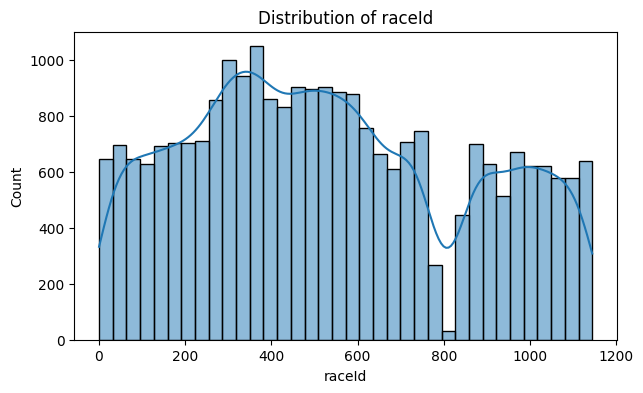



📌 COLUMN: year
Data Type: int64
Null Count: 0
Unique Values: 75

Mean: 1993.7084456780333
Std Dev: 18.15083582522663
Outliers: 0


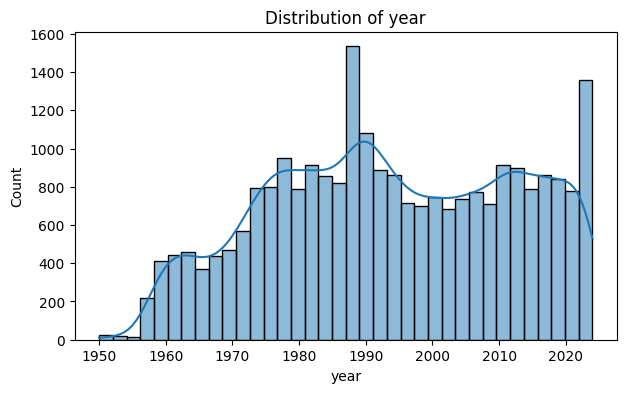



📌 COLUMN: round
Data Type: int64
Null Count: 0
Unique Values: 24

Mean: 8.759238699444886
Std Dev: 5.088596474858789
Outliers: 0


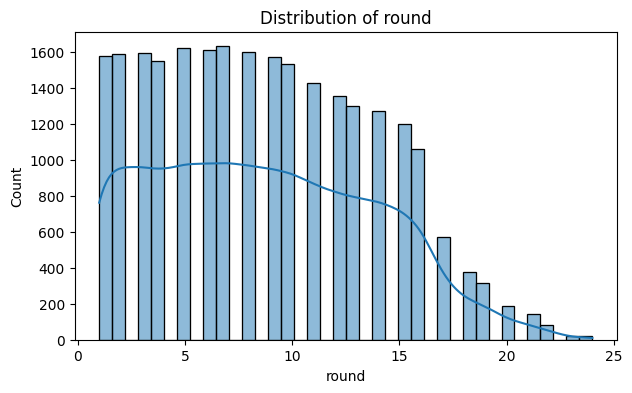



📌 COLUMN: circuitId
Data Type: int64
Null Count: 0
Unique Values: 77

Mean: 23.65614591593973
Std Dev: 19.090201319169214
Outliers: 462


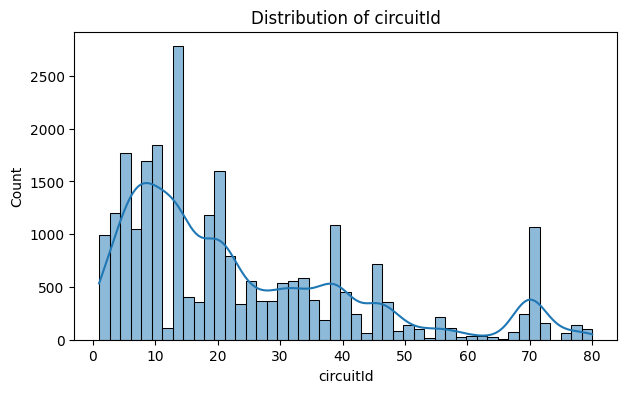



📌 COLUMN: month
Data Type: int32
Null Count: 0
Unique Values: 12
Values: [ 3  4  5  6  7  8  9 10 11  1  2 12]

Mean: 6.880610626486916
Std Dev: 2.430129279648994
Outliers: 0


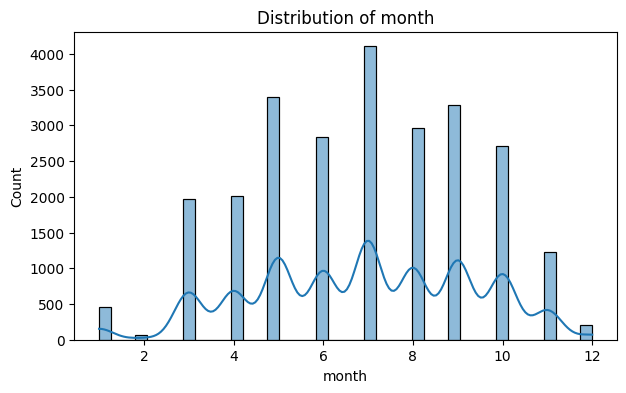



📌 COLUMN: dayofweek
Data Type: int32
Null Count: 0
Unique Values: 7
Values: [6 5 0 4 3 2 1]

Mean: 5.907692307692308
Std Dev: 0.5256838767708552
Outliers: 1493


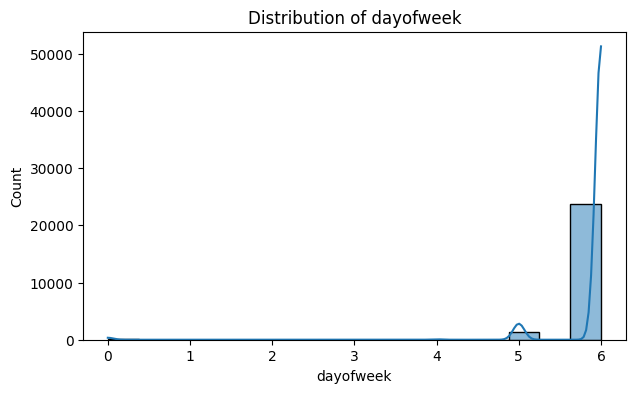



📌 COLUMN: constructorId
Data Type: float64
Null Count: 65
Unique Values: 175

Mean: 47.3070562512423
Std Dev: 61.258663460695885
Outliers: 3721


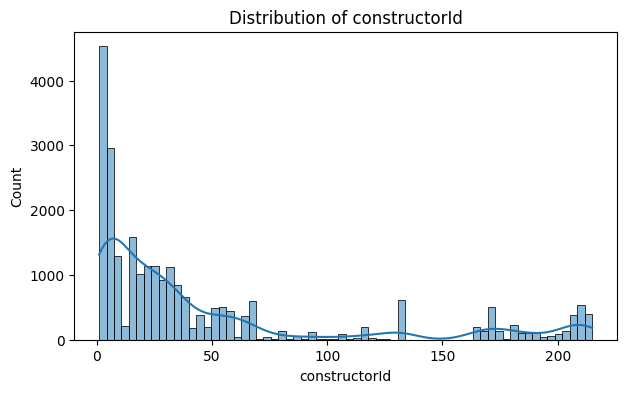



📌 COLUMN: points_x
Data Type: float64
Null Count: 65
Unique Values: 61

Mean: 4.225004969191016
Std Dev: 7.860490382363083
Outliers: 1858


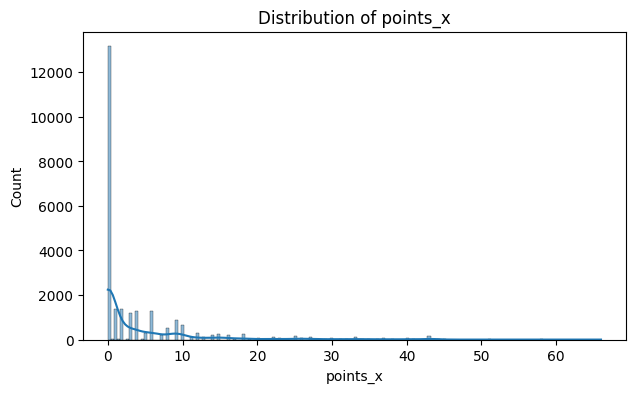



📌 COLUMN: grid
Data Type: float64
Null Count: 72
Unique Values: 34

Mean: 11.064378877047876
Std Dev: 7.140247195959534
Outliers: 0


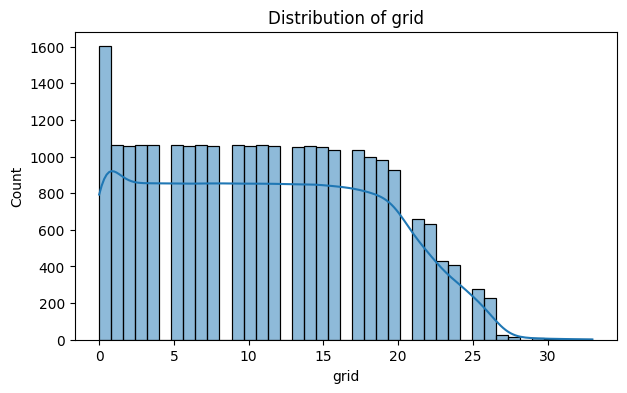



📌 COLUMN: position_x
Data Type: object
Null Count: 72
Unique Values: 34


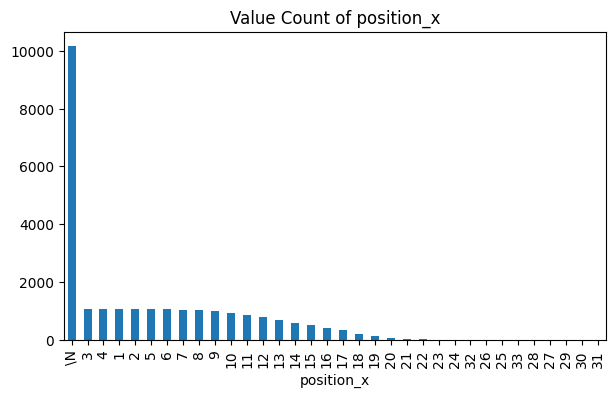



📌 COLUMN: positionOrder
Data Type: float64
Null Count: 72
Unique Values: 39

Mean: 12.803881024335931
Std Dev: 7.644923407563092
Outliers: 47


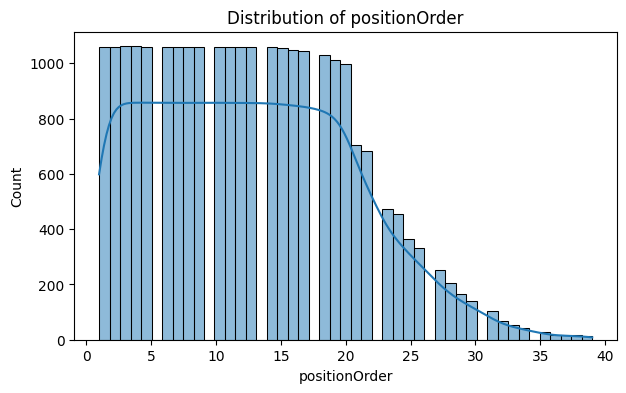



📌 COLUMN: points_y
Data Type: float64
Null Count: 72
Unique Values: 32

Mean: 2.052906791792588
Std Dev: 4.448497970269448
Outliers: 3754


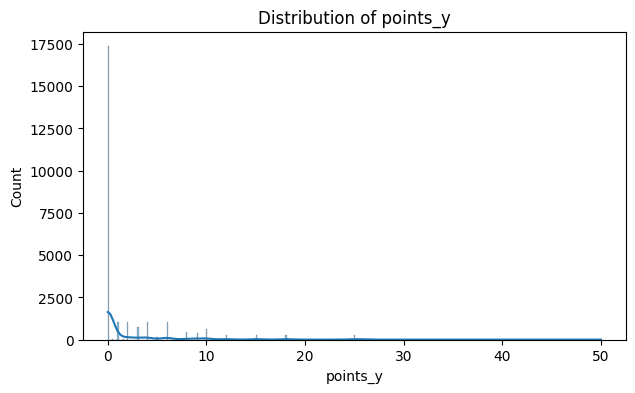



📌 COLUMN: fastestLap
Data Type: object
Null Count: 72
Unique Values: 81


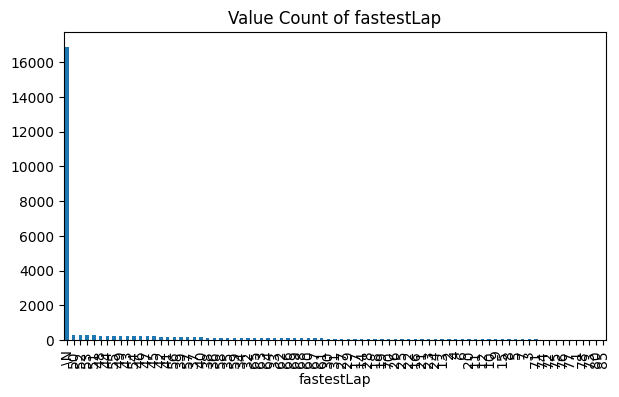

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

first_half_cols = [
    'raceId', 'year', 'round', 'circuitId', 'month', 'dayofweek',
    'constructorId', 'points_x', 'grid', 'position_x', 'positionOrder',
    'points_y', 'fastestLap'
]

for col in first_half_cols:
    print("="*80)
    print(f"📌 COLUMN: {col}")
    print("="*80)

    # Data type
    print("Data Type:", final_df[col].dtype)

    # Null values
    print("Null Count:", final_df[col].isna().sum())

    # Unique values
    unique_vals = final_df[col].nunique()
    print("Unique Values:", unique_vals)
    if unique_vals < 20:
        print("Values:", final_df[col].unique())

    # If numeric, show mean/std/outliers
    if pd.api.types.is_numeric_dtype(final_df[col]):
        print("\nMean:", final_df[col].mean())
        print("Std Dev:", final_df[col].std())

        # Outliers using IQR
        Q1 = final_df[col].quantile(0.25)
        Q3 = final_df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((final_df[col] < (Q1 - 1.5*IQR)) |
                    (final_df[col] > (Q3 + 1.5*IQR))).sum()
        print("Outliers:", outliers)

        # Plot distribution
        plt.figure(figsize=(7,4))
        sns.histplot(final_df[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()

    else:
        # For categorical: barplot
        plt.figure(figsize=(7,4))
        final_df[col].value_counts().plot(kind='bar')
        plt.title(f"Value Count of {col}")
        plt.show()

    print("\n")


📌 COLUMN: fastestLapTime
Data Type: float64
Null Count: 16968
Unique Values: 7473

Mean: 90.82759524963643
Std Dev: 12.338955961756676
Outliers: 30


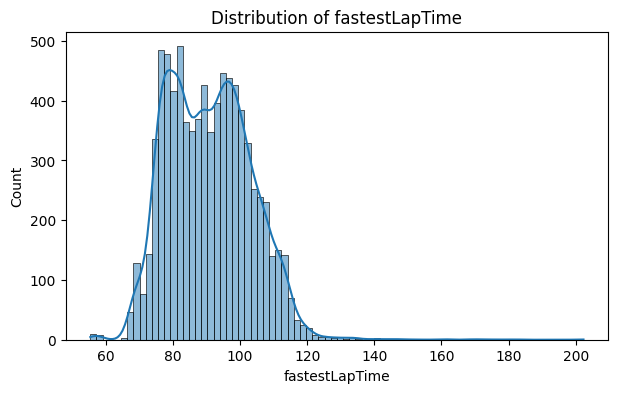



📌 COLUMN: fastestLapSpeed
Data Type: object
Null Count: 72
Unique Values: 7725


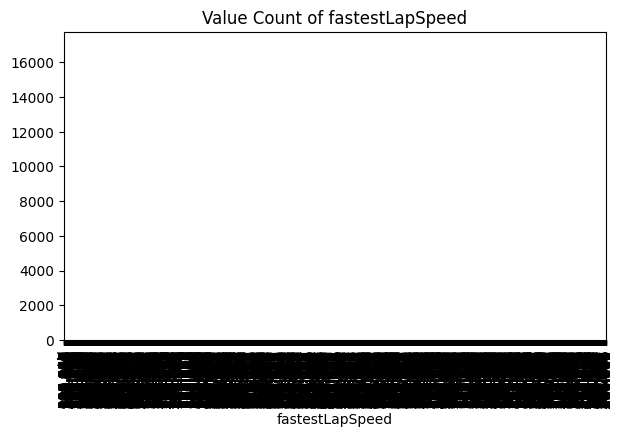



📌 COLUMN: standings_points
Data Type: float64
Null Count: 333
Unique Values: 579

Mean: 40.78842367501105
Std Dev: 86.65460519636726
Outliers: 2790


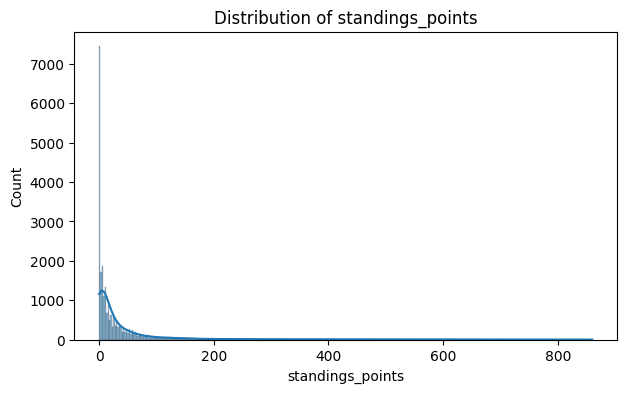



📌 COLUMN: standings_position
Data Type: float64
Null Count: 333
Unique Values: 21

Mean: 6.451400329489291
Std Dev: 3.9715746847962357
Outliers: 88


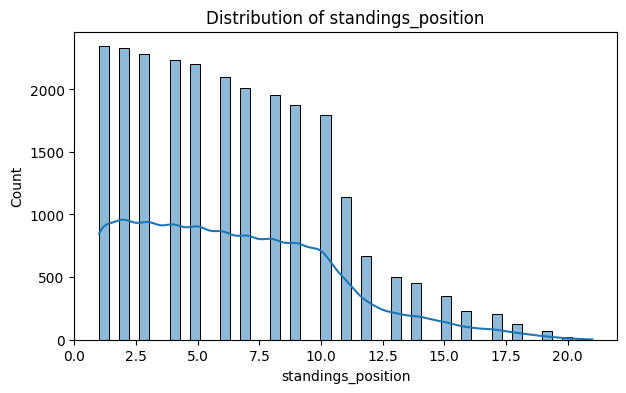



📌 COLUMN: season_wins
Data Type: float64
Null Count: 333
Unique Values: 22

Mean: 0.7990517137461325
Std Dev: 1.9610862866765133
Outliers: 2754


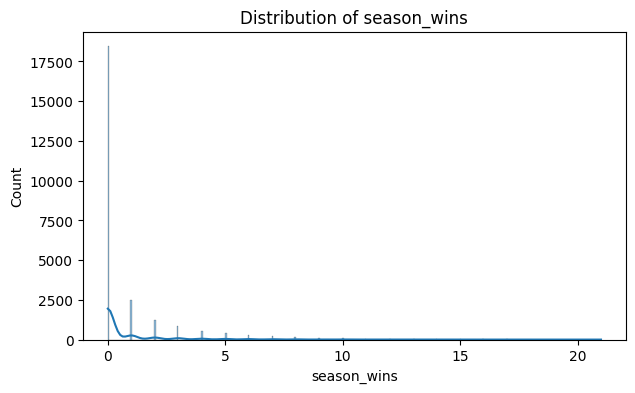



📌 COLUMN: nationality
Data Type: object
Null Count: 65
Unique Values: 23


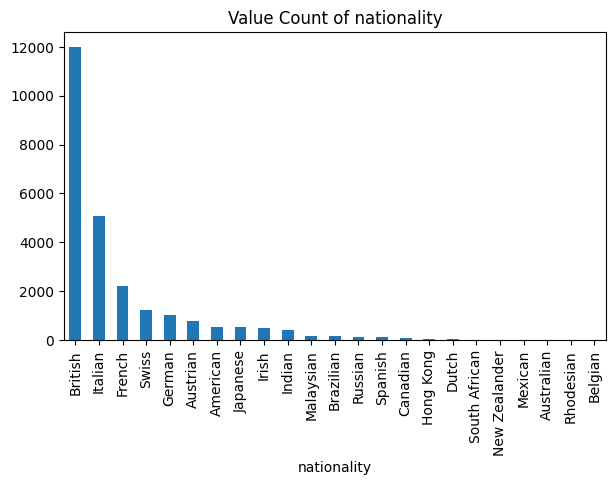



📌 COLUMN: position_y
Data Type: float64
Null Count: 14708
Unique Values: 50

Mean: 11.200485159817351
Std Dev: 5.76845445827447
Outliers: 0


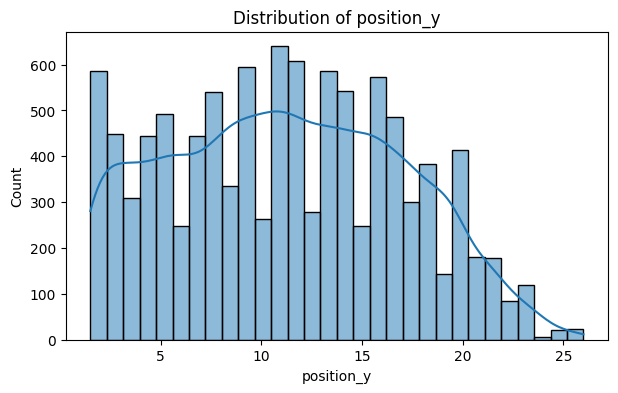



📌 COLUMN: q1
Data Type: float64
Null Count: 14742
Unique Values: 5111

Mean: 88.51860946745562
Std Dev: 13.996307329417139
Outliers: 154


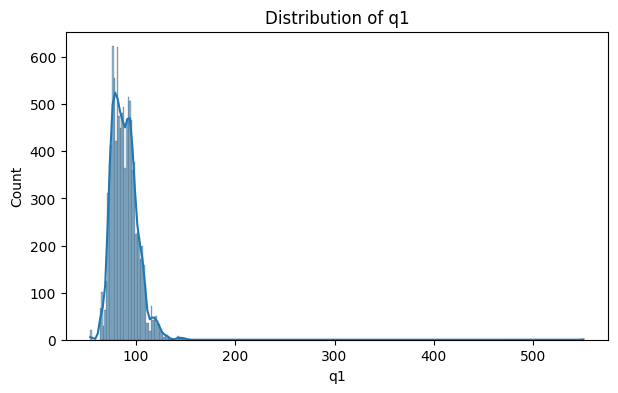



📌 COLUMN: q2
Data Type: float64
Null Count: 18543
Unique Values: 3279

Mean: 87.78669237681595
Std Dev: 12.093508620659279
Outliers: 42


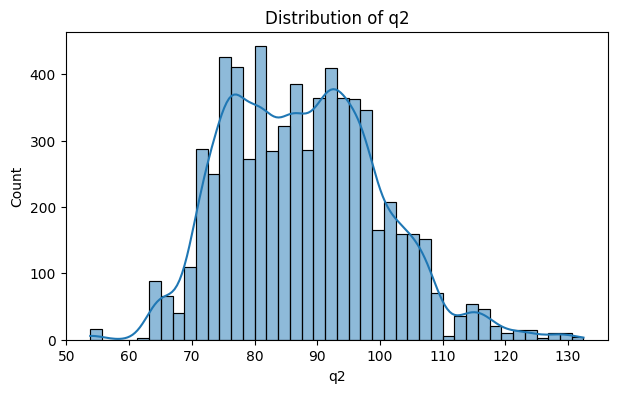



📌 COLUMN: q3
Data Type: float64
Null Count: 20620
Unique Values: 2271

Mean: 87.47162608695653
Std Dev: 12.236499147074591
Outliers: 28


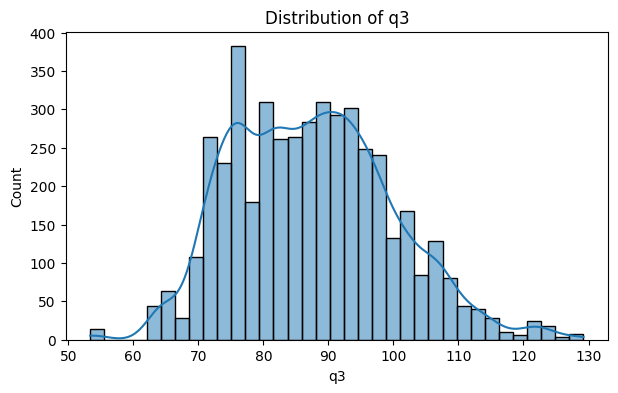



📌 COLUMN: sprint_grid
Data Type: float64
Null Count: 24860
Unique Values: 38

Mean: 9.922222222222222
Std Dev: 5.026066378131886
Outliers: 0


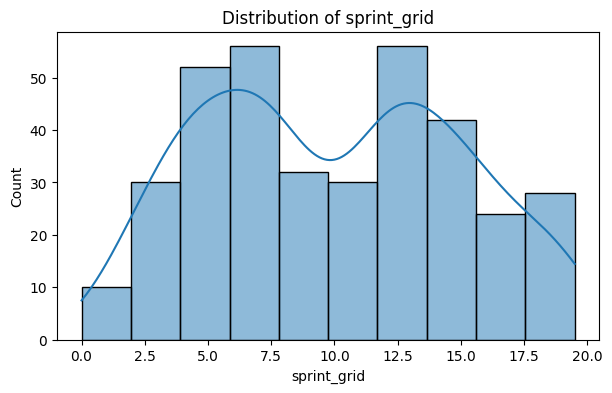



📌 COLUMN: sprint_position
Data Type: float64
Null Count: 24860
Unique Values: 36

Mean: 10.088888888888889
Std Dev: 5.162311340089927
Outliers: 0


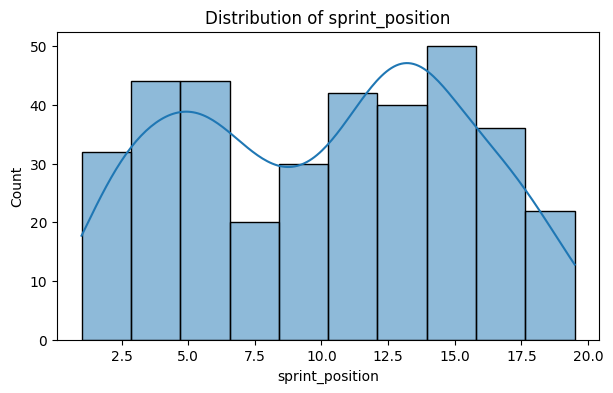



📌 COLUMN: sprint_points
Data Type: float64
Null Count: 24860
Unique Values: 16
Values: [nan 1.5 0.  0.5 1.  7.  3.5 6.  6.5 3.  5.  4.5 5.5 2.  7.5 4.  2.5]

Mean: 1.55
Std Dev: 2.244833126541192
Outliers: 0


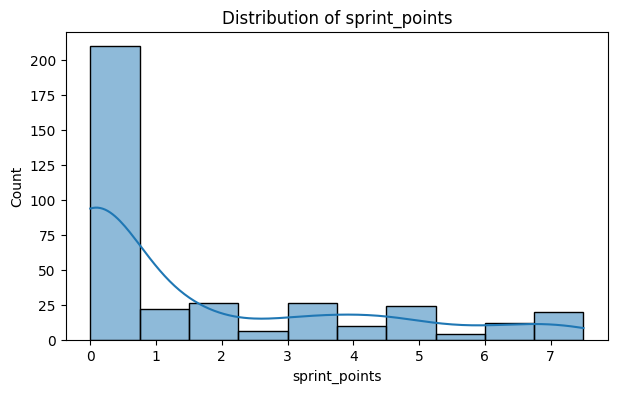

In [89]:
second_half_cols = [
    'fastestLapTime', 'fastestLapSpeed', 'standings_points', 'standings_position',
    'season_wins', 'nationality', 'position_y', 'q1', 'q2', 'q3',
    'sprint_grid', 'sprint_position', 'sprint_points'
]

for col in second_half_cols:
    print("="*80)
    print(f"📌 COLUMN: {col}")
    print("="*80)

    # Data type
    print("Data Type:", final_df[col].dtype)

    # Null values
    print("Null Count:", final_df[col].isna().sum())

    # Unique values
    unique_vals = final_df[col].nunique()

    print("Unique Values:", unique_vals)
    if unique_vals < 20:
        print("Values:", final_df[col].unique())

    # If numeric, show mean/std/outliers
    if pd.api.types.is_numeric_dtype(final_df[col]):
        print("\nMean:", final_df[col].mean())
        print("Std Dev:", final_df[col].std())

        # Outlier detection
        Q1 = final_df[col].quantile(0.25)
        Q3 = final_df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((final_df[col] < (Q1 - 1.5*IQR)) |
                    (final_df[col] > (Q3 + 1.5*IQR))).sum()
        print("Outliers:", outliers)

        # Plot distribution
        plt.figure(figsize=(7,4))
        sns.histplot(final_df[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()

    else:
        # Barplot for categorical
        plt.figure(figsize=(7,4))
        final_df[col].value_counts().plot(kind='bar')
        plt.title(f"Value Count of {col}")
        plt.show()

    print("\n")


In [92]:
# ============================
# CLEAN FIRST 5 COLUMNS
# ============================

# raceId: categorical
final_df['raceId'] = final_df['raceId'].astype('category')

# year: keep as int
final_df['year'] = final_df['year'].astype(int)

# circuitId: categorical
final_df['circuitId'] = final_df['circuitId'].astype('category')

# month: keep as int
final_df['month'] = final_df['month'].astype(int)

# dayofweek: keep as int
final_df['dayofweek'] = final_df['dayofweek'].astype(int)

# ============================
# CLEAN NEXT 5 COLUMNS
# constructorId, points_x, grid, position_x, positionOrder
# ============================

clean_df = final_df.copy()

# ---------------------------
# 1. constructorId → int
# ---------------------------
clean_df['constructorId'] = clean_df['constructorId'].fillna(-1).astype(int)

# ---------------------------
# 2. points_x → numeric
# ---------------------------
clean_df['points_x'] = clean_df['points_x'].astype(float)
clean_df['points_x'] = clean_df['points_x'].fillna(clean_df['points_x'].median())

# ---------------------------
# 3. grid → int
# ---------------------------
clean_df['grid'] = clean_df['grid'].fillna(clean_df['grid'].median())
clean_df['grid'] = clean_df['grid'].astype(int)

# ---------------------------
# 4. position_x → convert object to int
# ---------------------------

def convert_position(val):
    if str(val).isdigit():
        return int(val)
    if val in ['\\N', None, np.nan]:
        return np.nan

    # non-numerical statuses = treat as last place (40)
    return 40

clean_df['position_x'] = clean_df['position_x'].apply(convert_position)
clean_df['position_x'] = clean_df['position_x'].fillna(40).astype(int)

# ---------------------------
# 5. positionOrder → int
# ---------------------------
clean_df['positionOrder'] = clean_df['positionOrder'].fillna(
    clean_df['positionOrder'].median()
)
clean_df['positionOrder'] = clean_df['positionOrder'].astype(int)

# SHOW CLEANED COLUMNS
clean_df[['constructorId','points_x','grid','position_x','positionOrder']].head()


# ============================
# CLEAN: points_y, fastestLap
# ============================

# Make a copy to continue cleaning
clean_df = clean_df.copy()

# ---------------------------
# 1. points_y → numeric
# ---------------------------
clean_df['points_y'] = clean_df['points_y'].astype(float)
clean_df['points_y'] = clean_df['points_y'].fillna(clean_df['points_y'].median())

# ---------------------------
# 2. fastestLap → clean object column
# ---------------------------

def clean_fastest_lap(val):
    # Convert standard missing markers
    if val in ['\\N', None, np.nan]:
        return np.nan

    # Convert numeric (like '1', '2', '10')
    if isinstance(val, str) and val.isdigit():
        return int(val)

    # Else treat as missing
    return np.nan

clean_df['fastestLap'] = clean_df['fastestLap'].apply(clean_fastest_lap)

# Fill missing with 0 (meaning no fastest lap ranking for that driver)
clean_df['fastestLap'] = clean_df['fastestLap'].fillna(0).astype(int)
clean_df[['points_y', 'fastestLap']].head()





,points_y,fastestLap
0,10.0,17
1,8.0,43
2,0.0,0
3,0.0,39
4,6.0,50


In [93]:
# =============================
# CLEAN NEXT 5 COLUMNS (Second Half)
# fastestLapTime, fastestLapSpeed,
# standings_points, standings_position, season_wins
# =============================

# Make a copy to continue cleaning
clean_df = clean_df.copy()


# -------------------------------------------------------
# 1. fastestLapTime → float, fill missing with median
# -------------------------------------------------------
clean_df['fastestLapTime'] = clean_df['fastestLapTime'].astype(float)
clean_df['fastestLapTime'] = clean_df['fastestLapTime'].fillna(
    clean_df['fastestLapTime'].median()
)

# Optional: remove insane values (>200 sec)
clean_df['fastestLapTime'] = clean_df['fastestLapTime'].clip(upper=200)


# -------------------------------------------------------
# 2. fastestLapSpeed → object → float
# -------------------------------------------------------

def clean_fastest_lap_speed(val):
    # Handle missing/nonsense
    if val in ['\\N', None, np.nan]:
        return np.nan

    # Convert numeric strings to float
    try:
        return float(val)
    except:
        return np.nan

clean_df['fastestLapSpeed'] = clean_df['fastestLapSpeed'].apply(clean_fastest_lap_speed)

# Replace missing with median
clean_df['fastestLapSpeed'] = clean_df['fastestLapSpeed'].fillna(
    clean_df['fastestLapSpeed'].median()
)

# Remove unrealistic values (>400 km/h)
clean_df['fastestLapSpeed'] = clean_df['fastestLapSpeed'].clip(upper=400)


# -------------------------------------------------------
# 3. standings_points → float
# -------------------------------------------------------
clean_df['standings_points'] = clean_df['standings_points'].astype(float)

# Missing = 0 points
clean_df['standings_points'] = clean_df['standings_points'].fillna(0)

# Optional: cap massive outliers
clean_df['standings_points'] = clean_df['standings_points'].clip(upper=500)


# -------------------------------------------------------
# 4. standings_position → float → int
# -------------------------------------------------------
clean_df['standings_position'] = clean_df['standings_position'].astype(float)

clean_df['standings_position'] = clean_df['standings_position'].fillna(
    clean_df['standings_position'].median()
)

clean_df['standings_position'] = clean_df['standings_position'].astype(int)

# Cap invalid values (F1 standings max ~20–22)
clean_df['standings_position'] = clean_df['standings_position'].clip(upper=21)


# -------------------------------------------------------
# 5. season_wins → float → int
# -------------------------------------------------------
clean_df['season_wins'] = clean_df['season_wins'].astype(float)

# Replace NaN with 0 wins
clean_df['season_wins'] = clean_df['season_wins'].fillna(0)

clean_df['season_wins'] = clean_df['season_wins'].astype(int)

# Cap unrealistic values (>25 wins)
clean_df['season_wins'] = clean_df['season_wins'].clip(upper=25)


print("Cleaning for next 5 columns (Second Half) completed.")
clean_df[['fastestLapTime', 'fastestLapSpeed',
          'standings_points', 'standings_position',
          'season_wins']].head()


# ============================================================
# CLEAN: nationality, position_y, q1, q2, q3
# ============================================================

clean_df = clean_df.copy()

# ------------------------------------------------------------
# 1. nationality → categorical (low cardinality, safe)
# ------------------------------------------------------------
clean_df['nationality'] = clean_df['nationality'].fillna("Unknown")
clean_df['nationality'] = clean_df['nationality'].astype('category')


# ------------------------------------------------------------
# 2. position_y → integer ranking
#    - Many NaNs → replace with median
# ------------------------------------------------------------
clean_df['position_y'] = clean_df['position_y'].fillna(
    clean_df['position_y'].median()
)
clean_df['position_y'] = clean_df['position_y'].astype(int)


# ------------------------------------------------------------
# Helper function for q1/q2/q3
# Values sometimes show "\N" or non-numeric strings
# ------------------------------------------------------------
def clean_quali_time(val):
    if val in ['\\N', None, np.nan]:
        return np.nan

    try:
        return float(val)
    except:
        return np.nan

# ------------------------------------------------------------
# 3. q1 → float
# ------------------------------------------------------------
clean_df['q1'] = clean_df['q1'].apply(clean_quali_time)
clean_df['q1'] = clean_df['q1'].fillna(clean_df['q1'].median()).astype(float)

# ------------------------------------------------------------
# 4. q2 → float
# ------------------------------------------------------------
clean_df['q2'] = clean_df['q2'].apply(clean_quali_time)
clean_df['q2'] = clean_df['q2'].fillna(clean_df['q2'].median()).astype(float)

# ------------------------------------------------------------
# 5. q3 → float
# ------------------------------------------------------------
clean_df['q3'] = clean_df['q3'].apply(clean_quali_time)
clean_df['q3'] = clean_df['q3'].fillna(clean_df['q3'].median()).astype(float)

print("Cleaning for nationality, position_y, q1, q2, q3 completed.")

# Show preview of cleaned columns
clean_df[['nationality','position_y','q1','q2','q3']].head()

# =====================================================
# CLEAN LAST 3 COLUMNS: sprint_grid, sprint_position, sprint_points
# =====================================================

clean_df = clean_df.copy()

# -----------------------------------------------------
# 1. sprint_grid → numeric, fill missing with median
# -----------------------------------------------------
clean_df['sprint_grid'] = pd.to_numeric(clean_df['sprint_grid'], errors='coerce')
clean_df['sprint_grid'] = clean_df['sprint_grid'].fillna(clean_df['sprint_grid'].median())
clean_df['sprint_grid'] = clean_df['sprint_grid'].astype(int)

# -----------------------------------------------------
# 2. sprint_position → numeric, fill missing with median
# -----------------------------------------------------
clean_df['sprint_position'] = pd.to_numeric(clean_df['sprint_position'], errors='coerce')
clean_df['sprint_position'] = clean_df['sprint_position'].fillna(clean_df['sprint_position'].median())
clean_df['sprint_position'] = clean_df['sprint_position'].astype(int)

# -----------------------------------------------------
# 3. sprint_points → numeric, fill missing with 0 (driver scored no points)
# -----------------------------------------------------
clean_df['sprint_points'] = pd.to_numeric(clean_df['sprint_points'], errors='coerce')
clean_df['sprint_points'] = clean_df['sprint_points'].fillna(0)
clean_df['sprint_points'] = clean_df['sprint_points'].astype(float)

print("Cleaning for last 3 sprint columns completed.")
clean_df[['sprint_grid','sprint_position','sprint_points']].head()



Cleaning for next 5 columns (Second Half) completed.
Cleaning for nationality, position_y, q1, q2, q3 completed.
Cleaning for last 3 sprint columns completed.


,sprint_grid,sprint_position,sprint_points
0,9,11,0.0
1,9,11,0.0
2,9,11,0.0
3,9,11,0.0
4,9,11,0.0


In [94]:
import numpy as np
import pandas as pd

# =============================================================
# START WITH ORIGINAL DATA
# =============================================================
clean_df = final_df.copy()

# =============================================================
# PART 1 — CLEAN FIRST 5 COLUMNS
# =============================================================

clean_df['raceId'] = clean_df['raceId'].astype('category')
clean_df['year'] = clean_df['year'].astype(int)
clean_df['circuitId'] = clean_df['circuitId'].astype('category')
clean_df['month'] = clean_df['month'].astype(int)
clean_df['dayofweek'] = clean_df['dayofweek'].astype(int)

# =============================================================
# PART 2 — CLEAN NEXT 5: constructorId, points_x, grid, position_x, positionOrder
# =============================================================

clean_df['constructorId'] = clean_df['constructorId'].fillna(-1).astype(int)

clean_df['points_x'] = clean_df['points_x'].astype(float)
clean_df['points_x'] = clean_df['points_x'].fillna(clean_df['points_x'].median())

clean_df['grid'] = clean_df['grid'].fillna(clean_df['grid'].median())
clean_df['grid'] = clean_df['grid'].astype(int)

def convert_position(val):
    if str(val).isdigit():
        return int(val)
    if val in ['\\N', None, np.nan]:
        return np.nan
    return 40  # non-numeric → treat as last place

clean_df['position_x'] = clean_df['position_x'].apply(convert_position)
clean_df['position_x'] = clean_df['position_x'].fillna(40).astype(int)

clean_df['positionOrder'] = clean_df['positionOrder'].fillna(clean_df['positionOrder'].median())
clean_df['positionOrder'] = clean_df['positionOrder'].astype(int)

# =============================================================
# PART 3 — CLEAN points_y and fastestLap
# =============================================================

clean_df['points_y'] = clean_df['points_y'].astype(float)
clean_df['points_y'] = clean_df['points_y'].fillna(clean_df['points_y'].median())

def clean_fastest_lap(val):
    if val in ['\\N', None, np.nan]:
        return np.nan
    if isinstance(val, str) and val.isdigit():
        return int(val)
    return np.nan

clean_df['fastestLap'] = clean_df['fastestLap'].apply(clean_fastest_lap)
clean_df['fastestLap'] = clean_df['fastestLap'].fillna(0).astype(int)

# =============================================================
# PART 4 — CLEAN next 5: fastestLapTime, fastestLapSpeed,
# standings_points, standings_position, season_wins
# =============================================================

clean_df['fastestLapTime'] = clean_df['fastestLapTime'].astype(float)
clean_df['fastestLapTime'] = clean_df['fastestLapTime'].fillna(clean_df['fastestLapTime'].median())
clean_df['fastestLapTime'] = clean_df['fastestLapTime'].clip(upper=200)

def clean_fastest_lap_speed(val):
    if val in ['\\N', None, np.nan]:
        return np.nan
    try:
        return float(val)
    except:
        return np.nan

clean_df['fastestLapSpeed'] = clean_df['fastestLapSpeed'].apply(clean_fastest_lap_speed)
clean_df['fastestLapSpeed'] = clean_df['fastestLapSpeed'].fillna(clean_df['fastestLapSpeed'].median())
clean_df['fastestLapSpeed'] = clean_df['fastestLapSpeed'].clip(upper=400)

clean_df['standings_points'] = clean_df['standings_points'].astype(float)
clean_df['standings_points'] = clean_df['standings_points'].fillna(0)
clean_df['standings_points'] = clean_df['standings_points'].clip(upper=500)

clean_df['standings_position'] = clean_df['standings_position'].astype(float)
clean_df['standings_position'] = clean_df['standings_position'].fillna(clean_df['standings_position'].median())
clean_df['standings_position'] = clean_df['standings_position'].astype(int)
clean_df['standings_position'] = clean_df['standings_position'].clip(upper=21)

clean_df['season_wins'] = clean_df['season_wins'].astype(float)
clean_df['season_wins'] = clean_df['season_wins'].fillna(0)
clean_df['season_wins'] = clean_df['season_wins'].astype(int)
clean_df['season_wins'] = clean_df['season_wins'].clip(upper=25)

# =============================================================
# PART 5 — CLEAN nationality, position_y, q1, q2, q3
# =============================================================

clean_df['nationality'] = clean_df['nationality'].fillna("Unknown").astype('category')

clean_df['position_y'] = clean_df['position_y'].fillna(clean_df['position_y'].median()).astype(int)

def clean_quali_time(val):
    if val in ['\\N', None, np.nan]:
        return np.nan
    try:
        return float(val)
    except:
        return np.nan

clean_df['q1'] = clean_df['q1'].apply(clean_quali_time).fillna(clean_df['q1'].median()).astype(float)
clean_df['q2'] = clean_df['q2'].apply(clean_quali_time).fillna(clean_df['q2'].median()).astype(float)
clean_df['q3'] = clean_df['q3'].apply(clean_quali_time).fillna(clean_df['q3'].median()).astype(float)

# =============================================================
# PART 6 — CLEAN LAST 3 SPRINT COLUMNS
# =============================================================

clean_df['sprint_grid'] = pd.to_numeric(clean_df['sprint_grid'], errors='coerce')
clean_df['sprint_grid'] = clean_df['sprint_grid'].fillna(clean_df['sprint_grid'].median()).astype(int)

clean_df['sprint_position'] = pd.to_numeric(clean_df['sprint_position'], errors='coerce')
clean_df['sprint_position'] = clean_df['sprint_position'].fillna(clean_df['sprint_position'].median()).astype(int)

clean_df['sprint_points'] = pd.to_numeric(clean_df['sprint_points'], errors='coerce')
clean_df['sprint_points'] = clean_df['sprint_points'].fillna(0).astype(float)

# =============================================================
# DONE — FINAL CLEANED DATASET READY
# =============================================================

print("🎉 ALL columns cleaned successfully! Final dataset is ready.")
clean_df.head()


🎉 ALL columns cleaned successfully! Final dataset is ready.


,raceId,year,round,circuitId,month,dayofweek,constructorId,points_x,grid,position_x,...,season_wins,nationality,position_y,q1,q2,q3,sprint_grid,sprint_position,sprint_points,target
0,1,2009,1,1,3,6,23,18.0,1,1,...,1,British,1,85.1085,84.819,86.35350,9,11,0.0,0
1,1,2009,1,1,3,6,23,18.0,2,2,...,1,British,1,85.1085,84.819,86.35350,9,11,0.0,0
2,1,2009,1,1,3,6,1,0.0,12,40,...,0,British,14,86.3190,85.726,87.03225,9,11,0.0,0
3,1,2009,1,1,3,6,1,0.0,18,40,...,0,British,14,86.3190,85.726,87.03225,9,11,0.0,0
4,1,2009,1,1,3,6,7,11.0,20,3,...,0,Japanese,7,85.8465,85.273,87.05100,9,11,0.0,0


In [96]:
clean_df.columns

Index(['raceId', 'year', 'round', 'circuitId', 'month', 'dayofweek',
       'constructorId', 'points_x', 'grid', 'position_x', 'positionOrder',
       'points_y', 'fastestLap', 'fastestLapTime', 'fastestLapSpeed',
       'standings_points', 'standings_position', 'season_wins', 'nationality',
       'position_y', 'q1', 'q2', 'q3', 'sprint_grid', 'sprint_position',
       'sprint_points', 'target'],
      dtype='object')